# Analysis on Popular TV shows in IMDb using Web Scraping

## Objective

- Web scraping  from  IMDb web site using python programming.
- Identifying the release of most popular 250 TV shows and rating of the shows.
- Knowing about when TV shows became most popular.
- Visualizing the result in bar graph


##  Libraries used for Web Scraping



###  requests    
-   (Used to get HTTP request from website which we try to scrap the data)
### pickle     
-   (Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python                can be pickled so that it can be saved on disk. Pickling is a way to convert a python object (list, dict, etc.)                into a character stream.)
### collections
-    (This module implements specialized container datatypes providing alternatives to Python’s general purpose built-               in containers, dict, list, set, and tuple.)
### matplotlib  
-    (This module is used to represent the data in different ways (pie chart,bar graph etc.))
### numpy      
-    (NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and                  matrices, along with a large collection of high-level mathematical functions to operate on these arrays.)
### pandas      
-    (pandas is a software library written for the Python programming language for data manipulation and analysis. In                particular, it offers data structures and operations for manipulating numerical tables and time series.)


# Code used to Web Scrap the data from IMDb website

from bs4 import BeautifulSoup
import requests
import pickle
import collections
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def TVShows_list():
    getPage = requests.get('https://www.imdb.com/chart/toptv/')
    getPage.raise_for_status()
    Page = BeautifulSoup(getPage.text, 'html.parser')
    TV_details = {
        "data": []
    }
    TVList = Page.find_all('tr')
    #print(TVList)
    count= 0
    for data in TVList[1:251]: 
        count = count + 1
        print(count)
        #print(data)
        name = data.find('td',class_="titleColumn").text 
        print(name)
        print("     ")
        rating = data.find('td',class_="imdbRating").text
        print("Rating")
        print(rating)
        print("     ")
        
        details = {
                    "Name" : name,
                    "Rating" : rating,
                }
        TV_details['data'].append(details)
        print("        ")
    #print(TV_details)
    with open('TV_details_pickle.pkl', 'wb') as f:
        pickle.dump(TV_details,f,protocol=pickle.HIGHEST_PROTOCOL) 
        
TVShows_list()


## Code to Visualize Data in two different ways

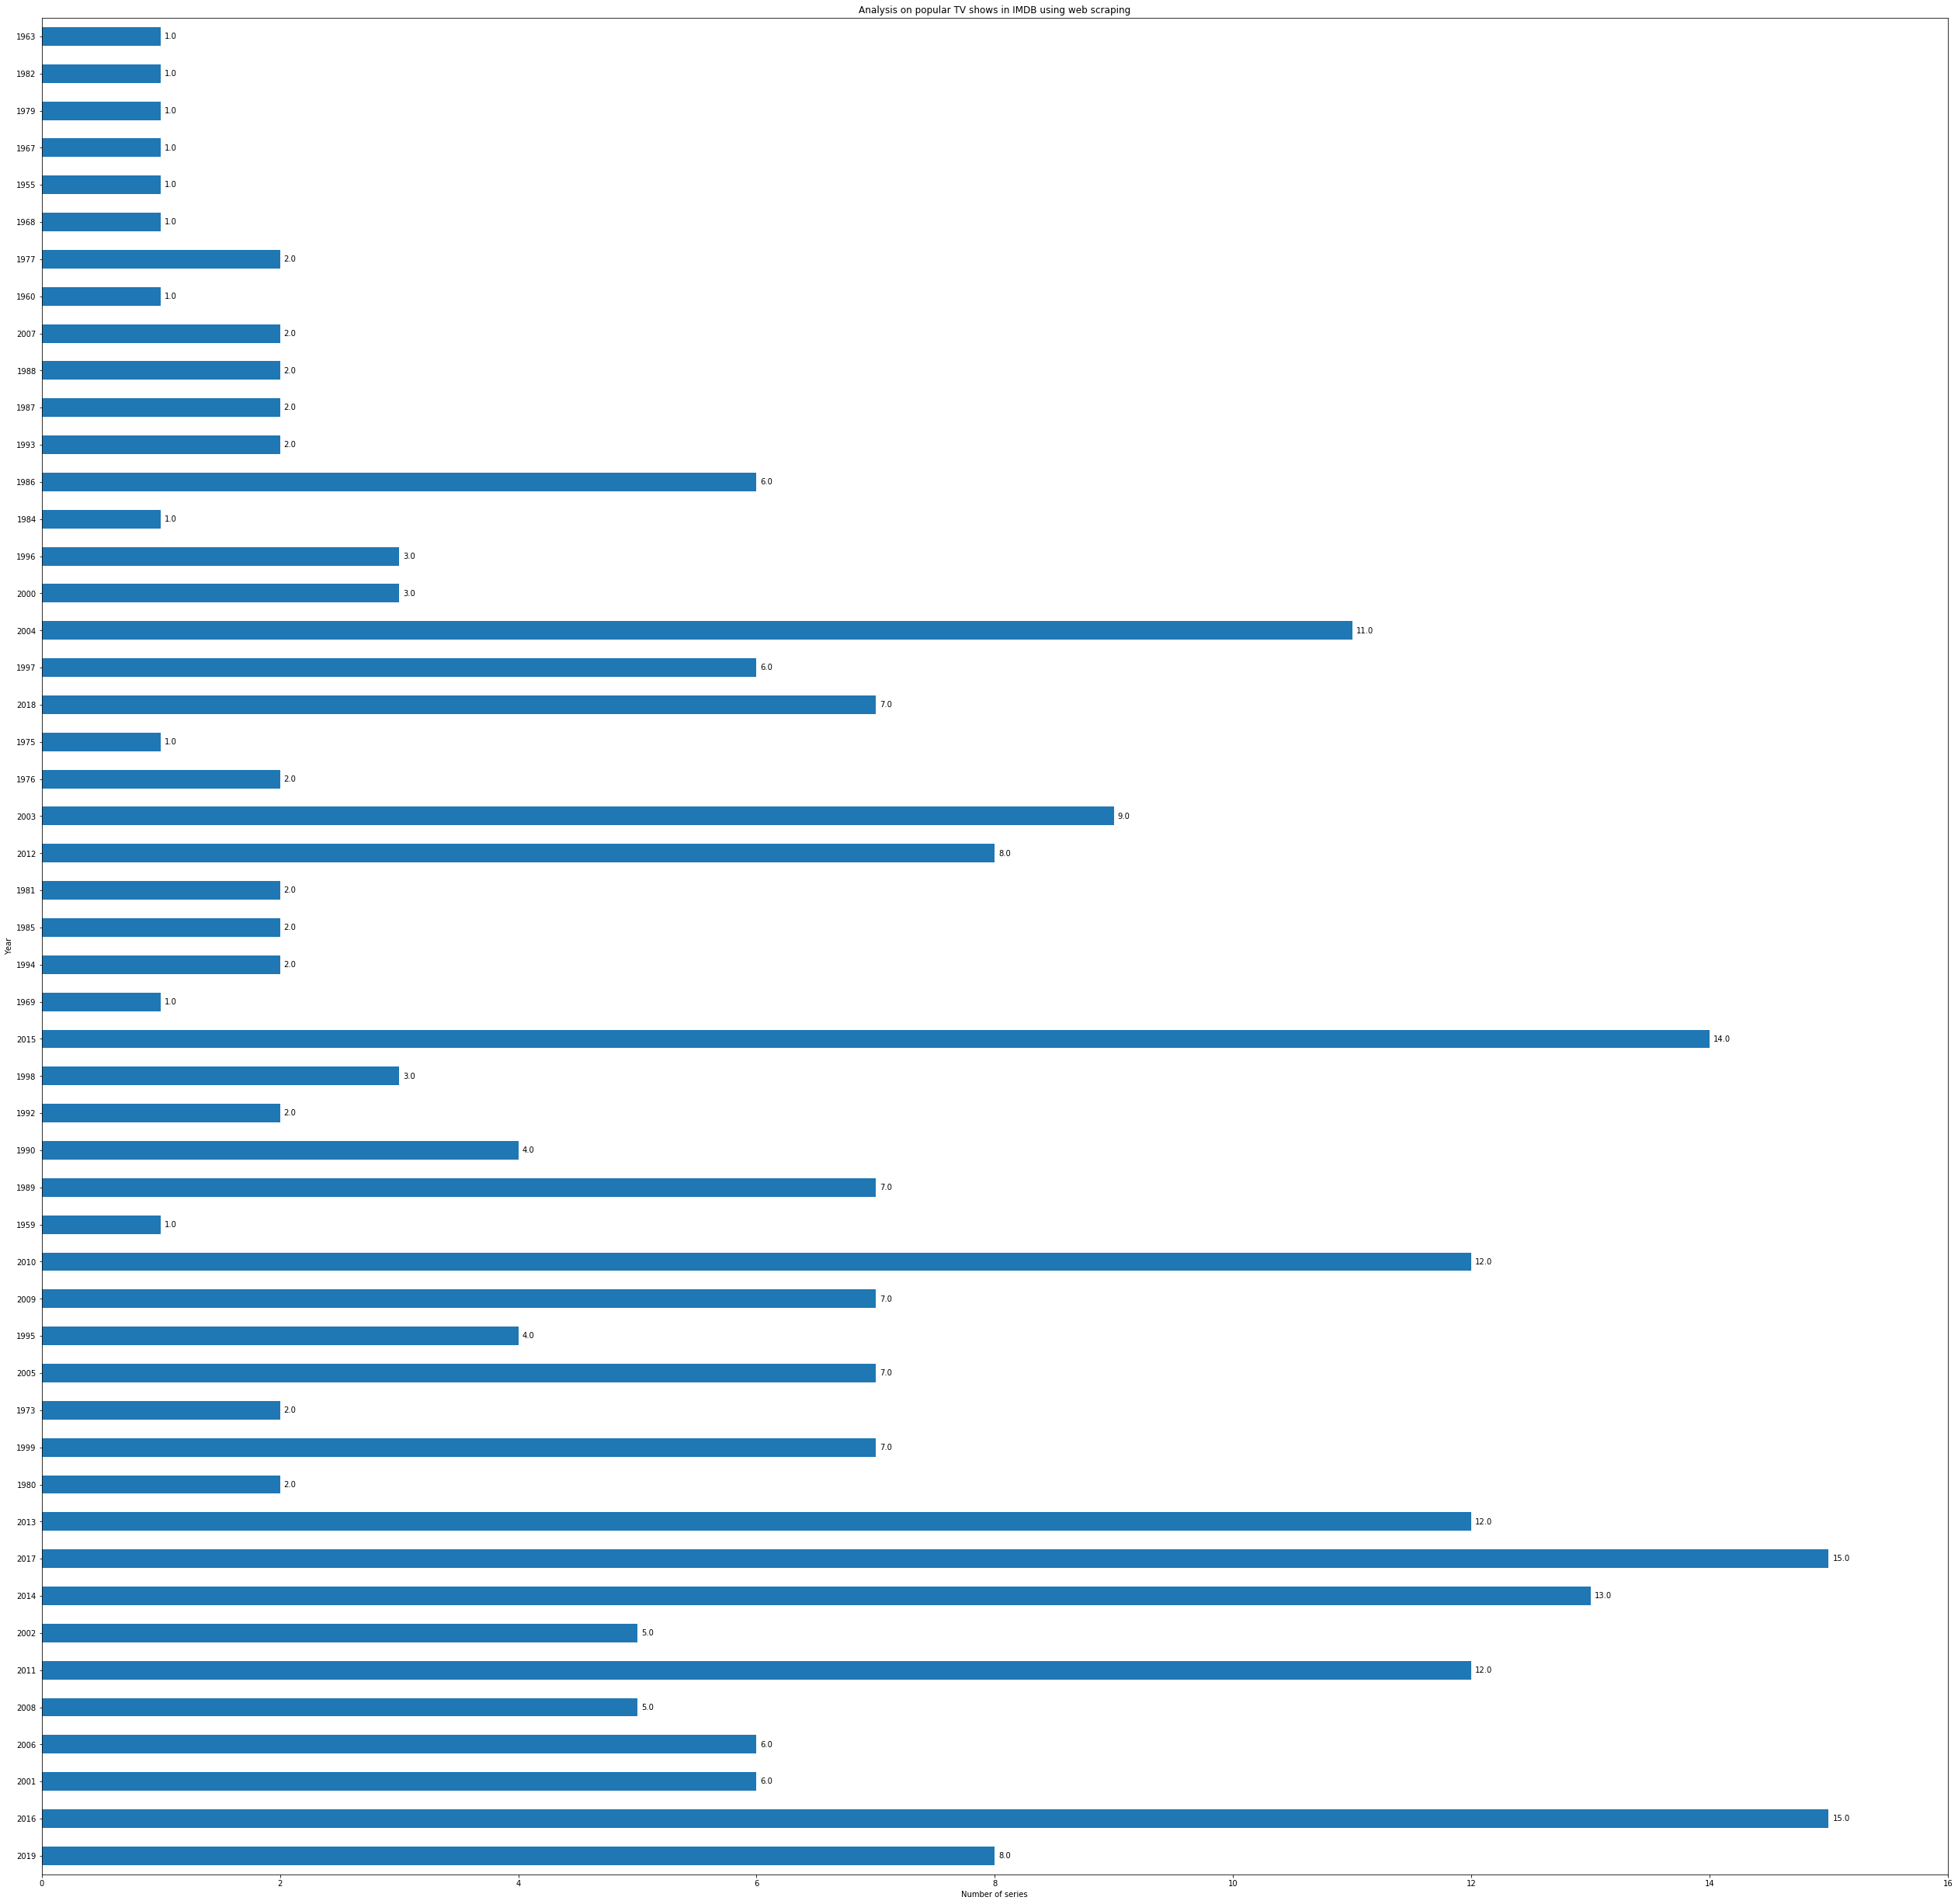

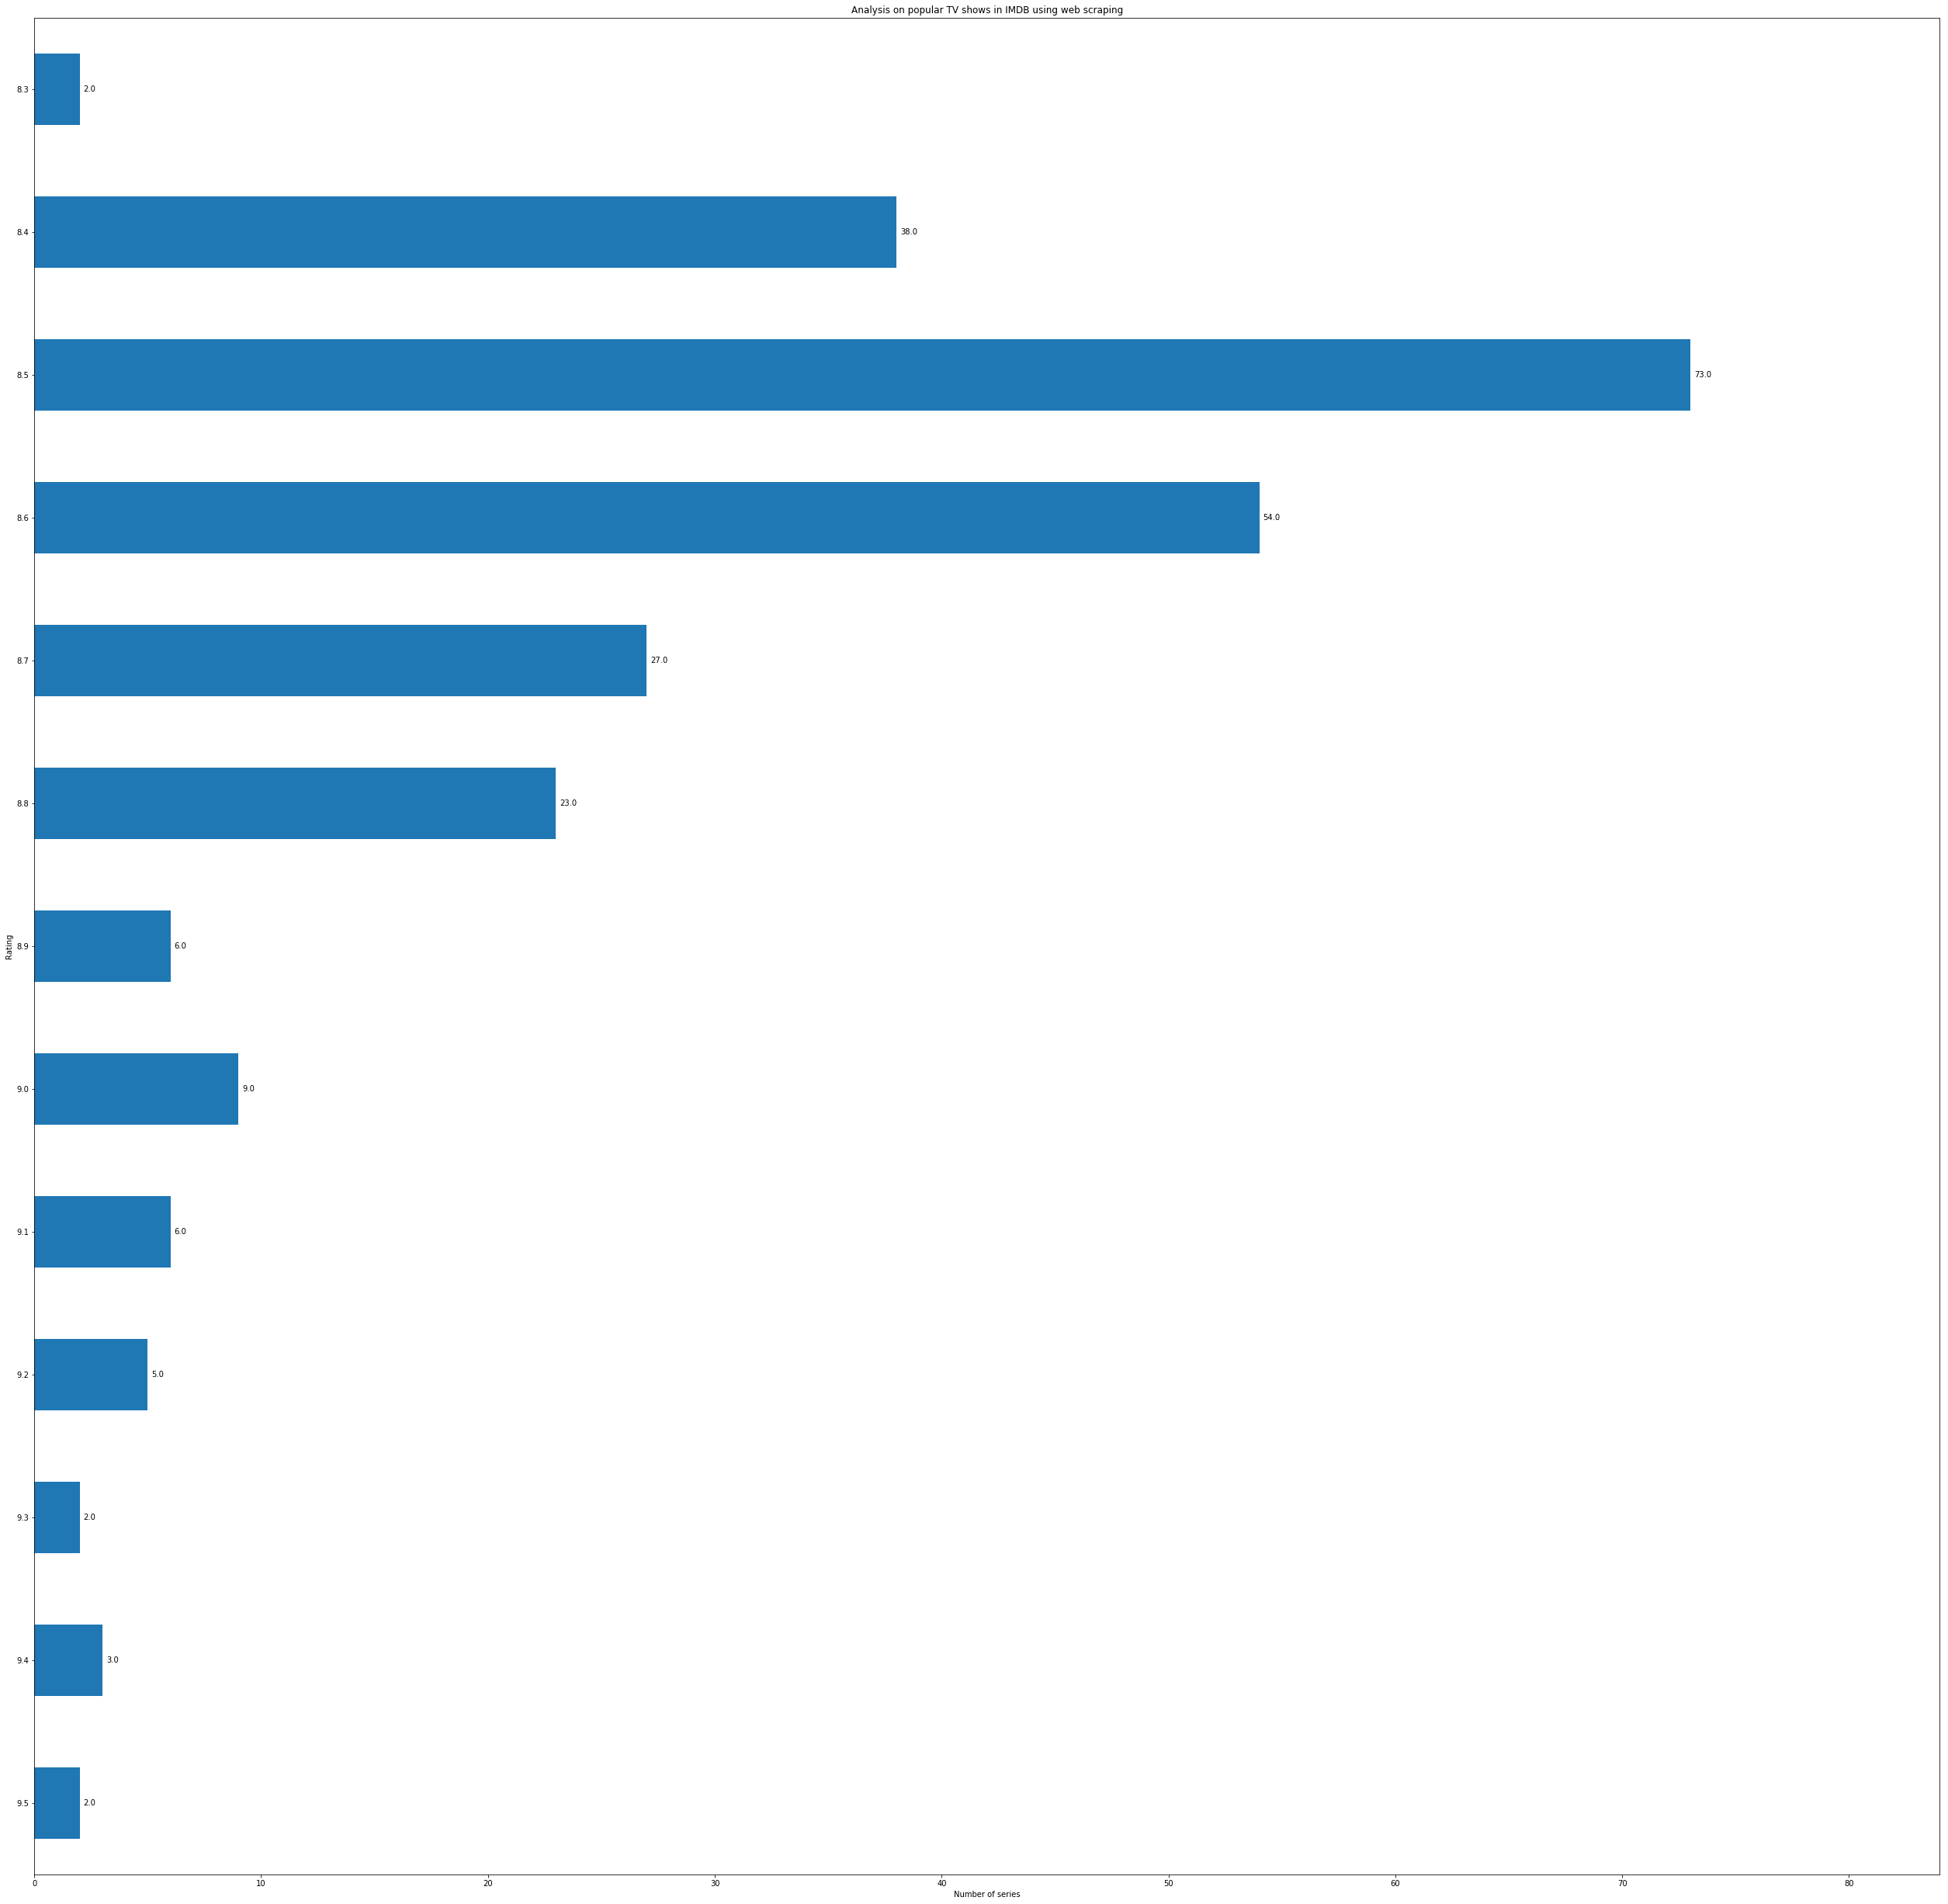

In [4]:
def results():
    ratings = []
    years = []
    counterRatingsKeys = []
    counterRatingsValues = []
    counterYearsKeys = []
    counterYearsValues = []
    with open('TV_details_pickle.pkl', 'rb') as f:   
        data = pickle.load(f)
        for l in data['data']:
            r = l['Rating'].strip()
            ratings.append(r)
            y =l['Name'].lstrip().splitlines( )[2][1:5]
            years.append(y)
    counterRating =collections.Counter(ratings)
    #print(counterRating)
    for key in counterRating.keys():
        counterRatingsKeys.append(key)
    for values in counterRating.values():
        counterRatingsValues.append(values)
    counterYears =collections.Counter(years)
    for key in counterYears.keys():
        counterYearsKeys.append(key)
    for values in counterYears.values():
        counterYearsValues.append(values)
    frequencies = counterYearsValues
    freq_series = pd.Series(frequencies)
    y_labels = counterYearsKeys
    plt.figure(figsize=(44, 44))
    ax = freq_series.plot(kind='barh')
    ax.set_title('Analysis on popular TV shows in IMDB using web scraping')
    ax.set_xlabel('Number of series')
    ax.set_ylabel('Year')
    ax.set_yticklabels(y_labels)
    ax.set_xlim(0, 16) # expand xlim to make labels easier to read
    rects = ax.patches
    

    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'

        # Use X value as label and format number with one decimal place
        label = "{:.1f}".format(x_value)

        # Create annotation
        plt.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(space, 0),          # Horizontally shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                va='center',                # Vertically center label
                ha=ha)                      # Horizontally align label differently for
    plt.savefig("image.png")
    
    
    frequencies = counterRatingsValues
    freq_series = pd.Series(frequencies)
    y_labels = counterRatingsKeys
    plt.figure(figsize=(44, 44))
    ax = freq_series.plot(kind='barh')
    ax.set_title('Analysis on popular TV shows in IMDB using web scraping')
    ax.set_xlabel('Number of series')
    ax.set_ylabel('Rating')
    ax.set_yticklabels(y_labels)
    ax.set_xlim(0, 84) # expand xlim to make labels easier to read
    rects = ax.patches
    

    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'

        # Use X value as label and format number with one decimal place
        label = "{:.1f}".format(x_value)

        # Create annotation
        plt.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(space, 0),          # Horizontally shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                va='center',                # Vertically center label
                ha=ha)                      # Horizontally align label differently for
    plt.savefig("image2.png")
   
    
    
results()


## Conclusion

- Conclusion from the above graph 
- It found that most popular TV shows were released mostly from 2009 to 2017.
- TV shows rating are given on mostly from 8.4 to 8.7.
